# Python Data visualization and manipulation  
# 1. Easy problem : Import this data into a Python Dataframe 
# a. Plot the same chart as you did in excel using your favourite plotting library 
# b. create a 5 day moving average on the plot 
# c. Use python Find local peaks and lows in the data . tabulated them 
# d. Find out every instance the Voltage went below 20 and tabulate it 
# 2. Bonus points : Find every instance where the downward slope accelerates in each 
# downward cycle and print the timestamp 
# 3. Bonus points : Host this python code on your favourite hosting server

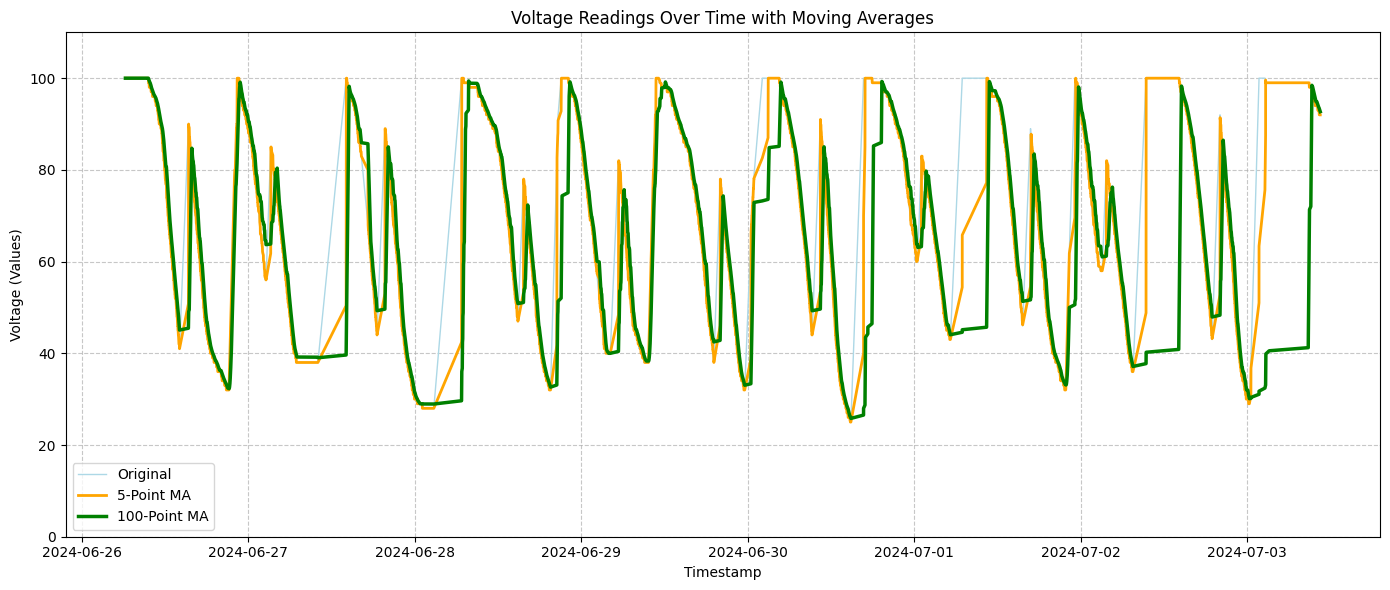

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A) Plot the same chart as you did in excel using your favourite plotting library 
df = pd.read_csv("Sample_Data.csv", parse_dates=['Timestamp'], dayfirst=True)
df['Values'] = pd.to_numeric(df['Values'], errors='coerce')
df.dropna(subset=['Values', 'Timestamp'], inplace=True)
df.set_index('Timestamp', inplace=True)

# B) create a 5 day moving average on the plot 
df['MA_5'] = df['Values'].rolling(5, min_periods=1).mean()
df['MA_100'] = df['Values'].rolling(100, min_periods=1).mean()

# Ploting the graph
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Values'], label='Original', color='lightblue', linewidth=1)
plt.plot(df.index, df['MA_5'], label='5-Point MA', color='orange', linewidth=2)
plt.plot(df.index, df['MA_100'], label='100-Point MA', color='green', linewidth=2.5)
plt.title('Voltage Readings Over Time with Moving Averages')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (Values)')
plt.ylim(0, 110)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
# C). Use python Find local peaks and lows in the data . tabulated them 
from scipy.signal import find_peaks

peaks, _ = find_peaks(df['Values'])
lows, _ = find_peaks(-df['Values'])

peak_table = df.iloc[peaks][['Values']].reset_index()
low_table = df.iloc[lows][['Values']].reset_index()

print("Local Peaks:\n", peak_table.head())
print("Local Lows:\n", low_table.head())

Local Peaks:
             Timestamp  Values
0 2024-06-26 09:57:56      98
1 2024-06-26 10:58:57      93
2 2024-06-26 11:49:49      83
3 2024-06-26 12:01:22      79
4 2024-06-26 12:55:48      62
Local Lows:
             Timestamp  Values
0 2024-06-26 09:57:38      97
1 2024-06-26 10:58:56      92
2 2024-06-26 11:49:32      82
3 2024-06-26 12:01:06      78
4 2024-06-26 12:55:00      61


In [33]:
# D). Find out every instance the Voltage went below 20 and tabulate it 
below_20 = df[df['Values'] < 20].reset_index()
print("Voltage < 20:\n", below_20[['Timestamp', 'Values']])

Voltage < 20:
 Empty DataFrame
Columns: [Timestamp, Values]
Index: []


In [34]:
# Bonus points : Find every instance where the downward slope accelerates in each downward cycle and print the timestamp 
df['diff'] = df['Values'].diff()
df['accel'] = df['diff'].diff()
accelerating_down = df[(df['diff'] < 0) & (df['accel'] < 0)]
print("Accelerating Downward Timestamps:\n", accelerating_down.index)

Accelerating Downward Timestamps:
 DatetimeIndex(['2024-06-26 09:36:30', '2024-06-26 09:42:33',
               '2024-06-26 09:57:38', '2024-06-26 09:58:47',
               '2024-06-26 10:11:06', '2024-06-26 10:33:38',
               '2024-06-26 10:41:38', '2024-06-26 10:54:01',
               '2024-06-26 10:58:56', '2024-06-26 10:59:29',
               ...
               '2024-07-03 00:09:09', '2024-07-03 00:09:43',
               '2024-07-03 02:38:03', '2024-07-03 08:54:39',
               '2024-07-03 09:17:38', '2024-07-03 09:21:12',
               '2024-07-03 09:34:56', '2024-07-03 09:44:50',
               '2024-07-03 10:07:38', '2024-07-03 10:20:17'],
              dtype='datetime64[ns]', name='Timestamp', length=1187, freq=None)
